##Análise Estatística sobre Planos de Governos de Candidatos a Presidentes do Brasil em 2022

###Disciplina: Tópicos Avançados em Ciência de Dados e IA
###Aluno: Robson Luis Silva

###***Trabalho realizado via GOOGLE COLAB***

In [2]:
#Instalando a biblioteca do pdfplumber, para trabalhar com arquivos em formato pdf
!pip install pdfplumber

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 40 kB 4.3 MB/s 
     |████████████████████████████████| 5.6 MB 14.8 MB/s 
     |████████████████████████████████| 3.1 MB 55.7 MB/s 
     |████████████████████████████████| 142 kB 72.8 MB/s 
     |████████████████████████████████| 4.0 MB 49.4 MB/s 
  Attempting uninstall: Pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2


In [1]:
#Importanto as bibliotecas necessárias para os processamentos e visualizações de dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pdfplumber    
import re  
from wordcloud import WordCloud                                                                                              
from collections import Counter
import nltk
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('portuguese')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
#Criando uma função que informa a quantidade de páginas do Plano de Governo de cada candidato
def paginas(Pdf, candidato):
    pdf = pdfplumber.open('/content/planos_de_governo/' + Pdf + '.pdf')
    contapage = len(pdf.pages)
    print(f'O Plano de Governo do(a) candidato(a) {candidato} tem {contapage} páginas.')

In [3]:
#Criando uma função que lista do nomes dos candidados a presidente, com base nos Planos de Governo (formato pdf), cujos uploads
#foram realizados para a pasta '/content/planos_de_governo/' criada no Google Colab

def lista_candid():
    lista = []
    for file in os.listdir('/content/planos_de_governo/'):
        if file.endswith('.pdf'):
            lista.append(file)
    lista = [x.replace('.pdf', '') for x in lista]        #remove a extenção pdf do nome do arquivo
    return lista

In [5]:
#Criando a variável "candidatos" e printando a lista de candidatos a presidente
candidatos = lista_candid()
print(candidatos)

['eymael', 'vera', 'jefferson', 'soraya', 'simone', 'bolsonaro', 'lula', 'ciro', 'leonardo', 'davila', 'marcal', 'sofia']


In [6]:
#Função que executa os pré-processamentos - aplicar letra minúscula e retirada de caracteres especiais, por exemplo. 
def pre_process(Pdf):
    texto_limpo = []
    pdf = pdfplumber.open(Pdf)
    contapage = len(pdf.pages)
    texto = ''
    for i in range(contapage):
        texto += pdf.pages[i].extract_text()
    texto = texto.lower()
    texto = re.sub(r'[^a-zA-Z\s]', '', texto, re.I | re.A)
    texto = re.findall(r'\w+', texto)
    for palavra in texto:
        if (palavra not in stopwords) & (len(palavra) > 3):
            texto_limpo.append(palavra)
    testo_limpo = texto_limpo.sort()
    texto_limpo = ' '.join(texto_limpo)
    texto_limpo = texto_limpo.strip()
    return texto_limpo

In [7]:
#Função que cria uma tabela com as principais palavras do Plano de Governo, bem como suas respectivas contagens
def tabela(Pdf):
    texto = pre_process('/content/planos_de_governo/' + Pdf + '.pdf')
    palavras = texto.split()
    contagem = Counter(palavras)
    df = pd.DataFrame(contagem.most_common(20), columns=['Palavras', 'Contagem'])
    return df

In [8]:
#Printando a tabela referente ao candidato Jair Bolsonaro
tabela(candidatos[5])

,Palavras,Contagem
0,governo,258
1,brasil,129
2,plano,121
3,nacional,104
4,segurança,98
5,desenvolvimento,97
6,meio,85
7,saúde,85
8,ações,83
9,país,76


In [9]:
#Função para salvar as tabelas criadas em formato csv
def tabela_csv(Pdf):
    df = tabela(Pdf)
    nome_arquivo = Pdf.split('.')[0]
    df.to_csv('{}.csv'.format(nome_arquivo), index=False)
    print('Arquivo salvo!')

In [10]:
#Função para criar a nuvem de palavras do Plano de Governo de cada candidato

def wordcloud(Pdf,candidato):
    candidato = candidato.capitalize()
    texto = pre_process('/content/planos_de_governo/' + Pdf + '.pdf')
    wordcloud = WordCloud(width=800, height=500,max_font_size=110, collocations=False).generate(texto)
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(f'Candidato {candidato}')
    plt.axis('off')
    plt.show()

In [11]:
#Função para criar um gráfico de barras verticais com as principais palavras dos Planos de Governo
#e suas respectivas contagens

def grafico(Pdf, candidato):
    candidato = candidato.capitalize()
    df = tabela(Pdf)
    df.plot.bar(x='Palavras', y='Contagem', figsize=(10, 7))
    plt.title(f'Candidato {candidato}')
    plt.show()

In [12]:
#Quantidade de páginas do Plano de Governo de Felipe D'Avila 
paginas(candidatos[9], candidatos[9])

O Plano de Governo do(a) candidato(a) davila tem 36 páginas.


In [13]:
#Quantidade de páginas do Plano de Governo de Jair Bolsonaro
paginas(candidatos[5], candidatos[5])

O Plano de Governo do(a) candidato(a) bolsonaro tem 48 páginas.


#0) Eymael - DC

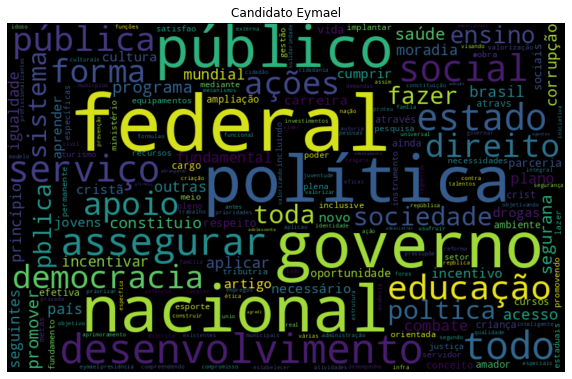

In [14]:
#Nuvem de plavra do plano de governo de Constituinte Eymael - DC
wordcloud(candidatos[0], candidatos[0])

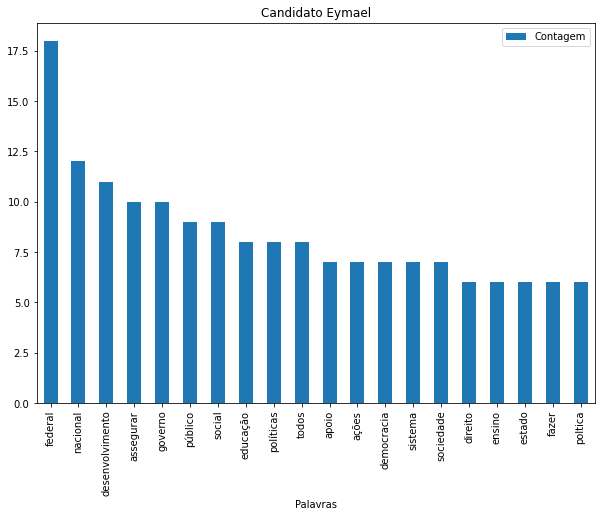

In [15]:
grafico(candidatos[0], candidatos[0])

Observa-se, portanto, que o Plano de Governo do candidato Eymael apresenta como principais repetições as palavras 'federal', 'nacional' e 'desenvolvimento'. Destaque para a palavra "democracia", que ocupa a 13ª posição.

#1) Vera - PSTU

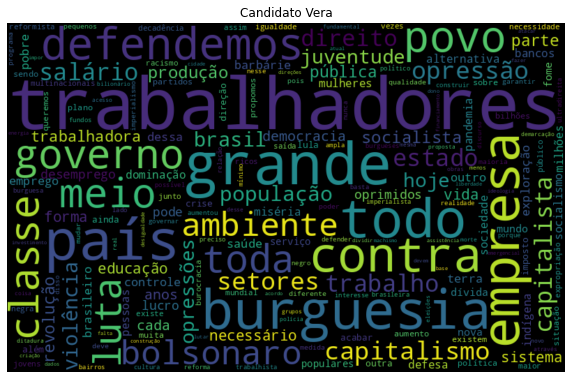

In [ ]:
#Nuvem de plavra do plano de governo de Vera - PSTU
wordcloud(candidatos[1], candidatos[1])

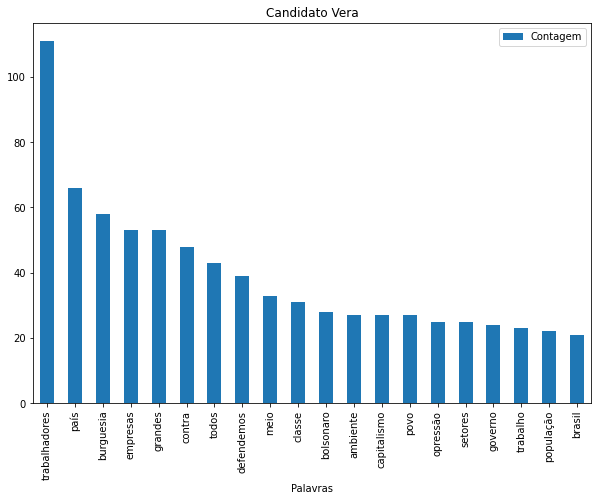

In [ ]:
grafico(candidatos[1], candidatos[1])

O Plano de Governo da Vera, do PSTU, aprensenta um viés de extrema esquerda, com grande destaque para a palavra "trabalhadores. Outras palavras que se destacam, adicionalmente, são "burguesia" e "capitalismo", o que nos leva a inferir que tal candidata apresenta, provavelmente, um plano de governo contrário aos príncipios do capitalismo.

#2) Roberto Jefferson - PTB

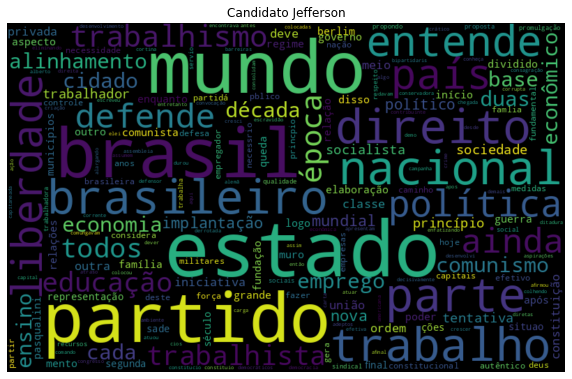

In [ ]:
#Nuvem de plavra do plano de governo de Roberto Jefferson - PTB
wordcloud(candidatos[2], candidatos[2])

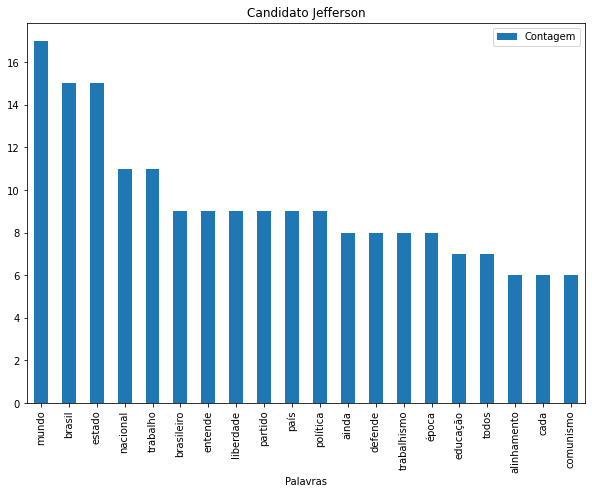

In [ ]:
grafico(candidatos[2], candidatos[2])

Quando ao Plano do Roberto Jefferson, destacam-se as palavras "liberdade" e "comunismo". Sabe-se que o candidato defende posições de extrema direita, com defesa à ampla liberdade de expressão e com adoção de ideias contrárias ao comunismo.

#3) Soraya Thronicke

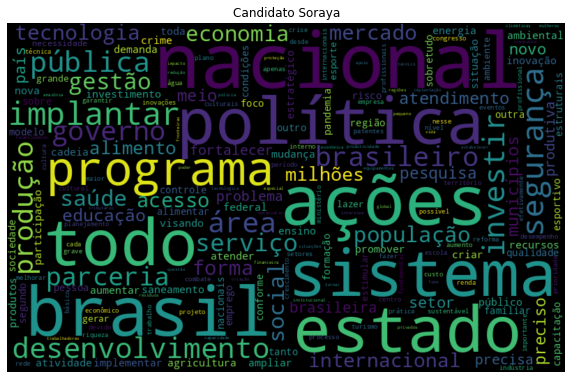

In [ ]:
#Nuvem de plavra do plano de governo de Soraya Thronicke - União Brasil
wordcloud(candidatos[3], candidatos[3])

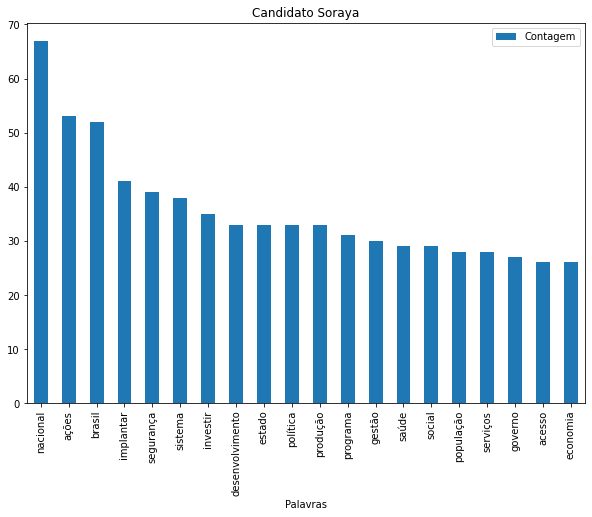

In [ ]:
grafico(candidatos[3], candidatos[3])

O Plano da Soraya traz como aspecto relevante a "segurança", que figurou na 5ª colocação, ao passo que "saúde" (14ª) e "social" (15ª). Portanto, infere-se que a candidata preveja ações (2ª) mais amplas na perspectiva de segurança nacional.

#4) Simone Tebet - MDB

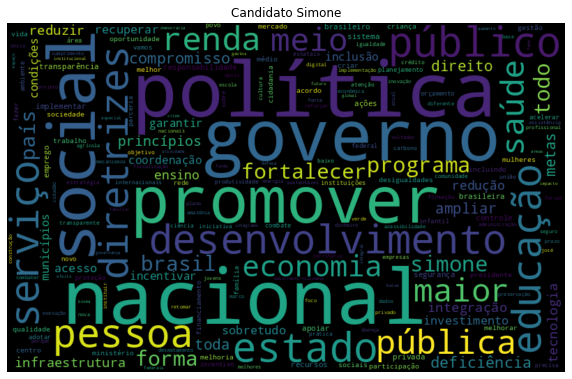

In [ ]:
#Nuvem de plavra do plano de governo de Simone Tebet (MDB)
wordcloud(candidatos[4], candidatos[4])

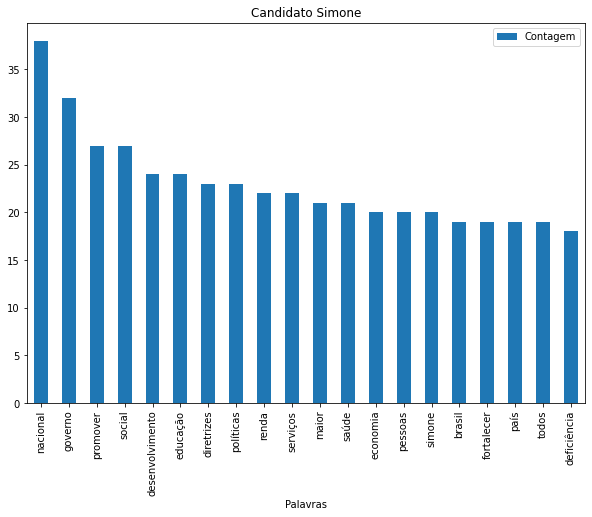

In [ ]:
grafico(candidatos[4], candidatos[4])

Já Simone Tebet foi a primeira a apresentar, com destaque, o tema "educação", que figura na 6ª colocação, embora a palavra "social" tenha tido maior destaque, figurando na 4ª posição. Já as palavras "diretrizes" e "políticas" tende a passar a ideia de que se trata de uma candidata que pretende implementar ações mais estruturantes, a exemplo da educação, já que a candidata também é professora.

#5) Jair Bolsonaro - PL

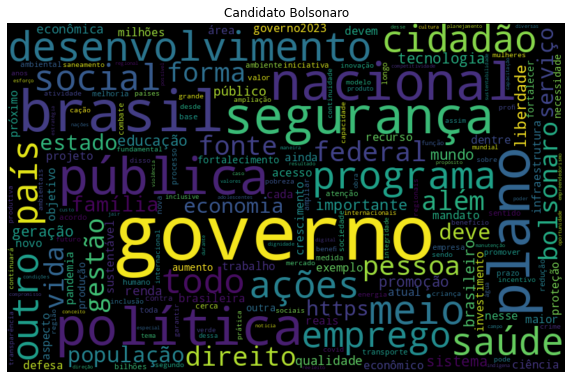

In [ ]:
#Nuvem de plavra do plano de governo de Jair Bolsonaro - PL
wordcloud(candidatos[5], candidatos[5])

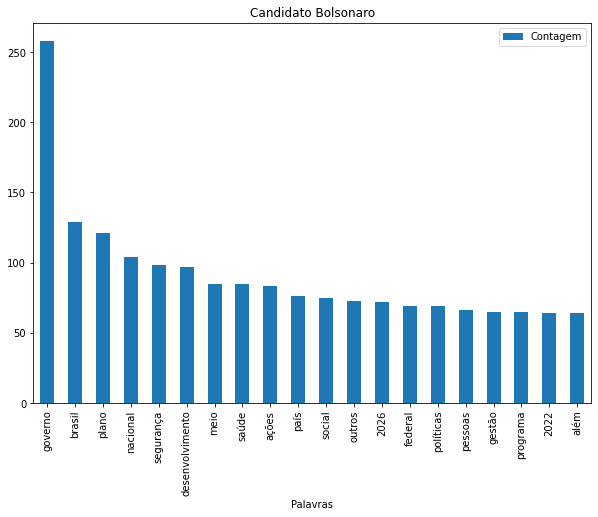

In [ ]:
grafico(candidatos[5], candidatos[5])

Já o Plano de Bolsonaro tende a destacar a palavra "governo", "brasil e "nacional", o que demonstra a tendência de um plano nacionalista e com viés focado no Brasil, em contraposição à globalização. Também chama a atenção a palavra "segurança", uma das principais bandeiras de seu governo.

#6) Lula - PT

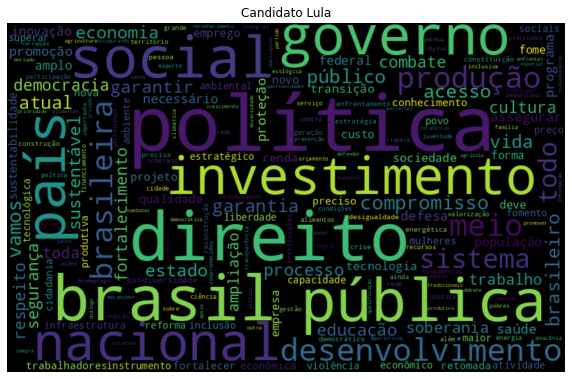

In [ ]:
#Nuvem de plavra do plano de governo de Lula - PT
wordcloud(candidatos[6], candidatos[6])

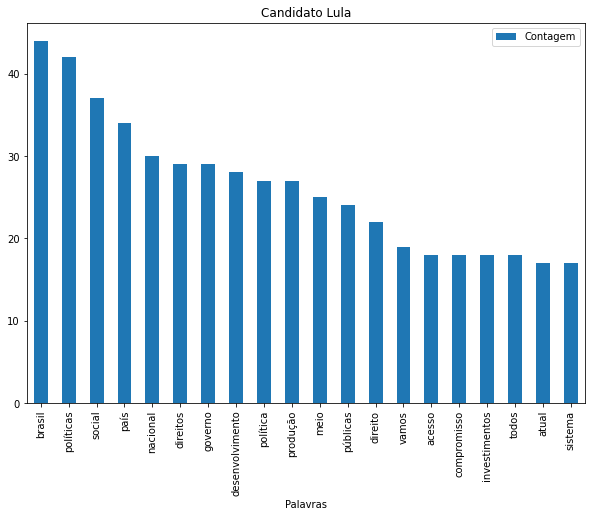

In [ ]:
grafico(candidatos[6], candidatos[6])

Como bandeira perene do PT, a palavra "social" aparece na 3ª posição. Em seguida, aparecem "direitos", o que leva a crer que o plano envolve a defesa dos direitos da classe trabalhadora, uma vez que o próprio nome do partido expressa isso.

#7) Ciro Gomes - PDT

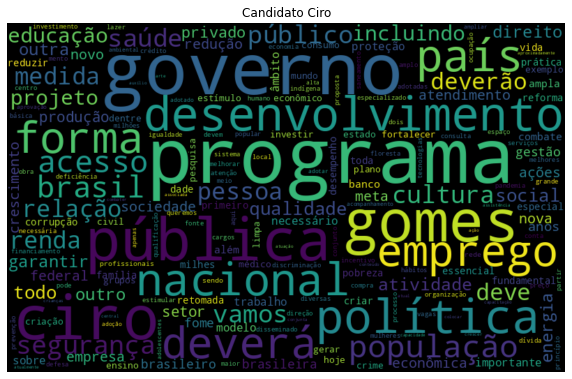

In [ ]:
#Nuvem de plavra do plano de governo de Ciro Gomes - PDT
wordcloud(candidatos[7], candidatos[7])

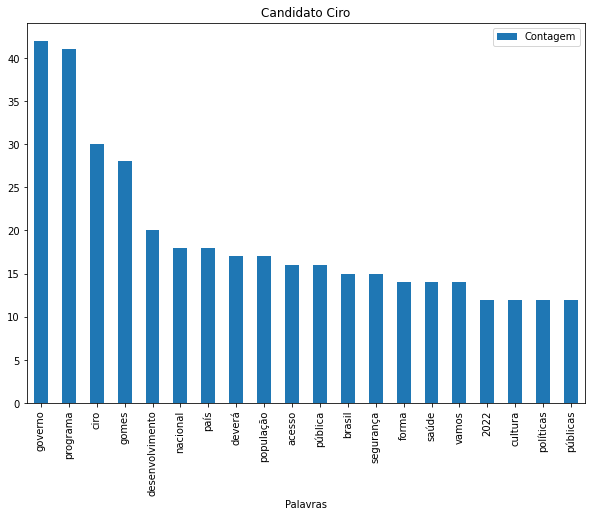

In [ ]:
grafico(candidatos[7], candidatos[7])

Quanto a Ciro Gomes, destaca-se a palavra "cultura". Recentemente, o candidato confirmou que, se eleito, irá recriar o Ministério da Cultura. Verifica-se a ocorrência de outras palavras também bastante citadas nos demais planos de candidatos, a exemplo de "governo", "desenvolvimento" e "programa".

#8) Leonardo Péricles - PUP

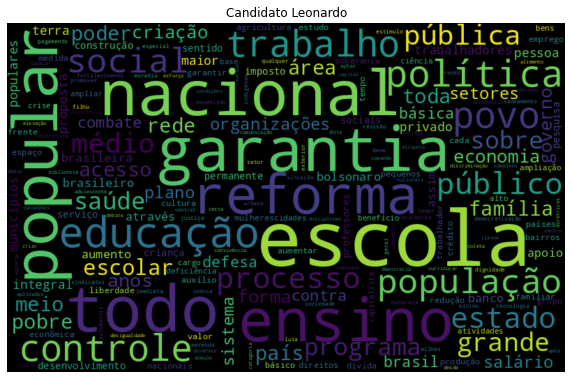

In [ ]:
#Nuvem de plavra do plano de governo de Lenardo Péricles - PUP
wordcloud(candidatos[8], candidatos[8])

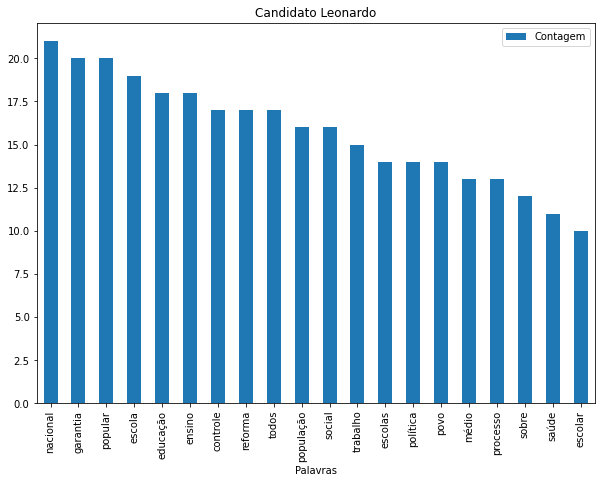

In [ ]:
grafico(candidatos[8], candidatos[8])

O plano de governo do Leonardo privilegia palavras como "escola", "educação", "ensino", "social", "povo", o que indica um viés de esquerda, em contraposição às principais bandeiras da direita, a exemplo de segurança e nacionalismo.

#9) Felipe D'Ávila - Novo

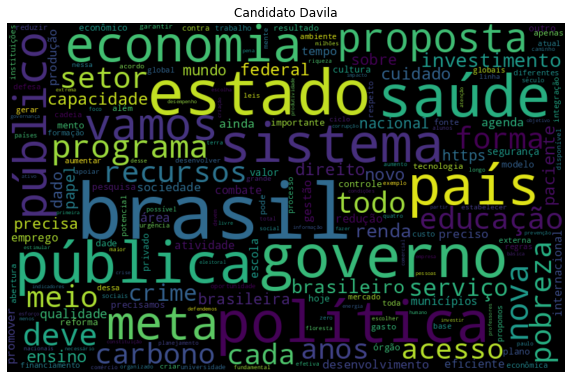

In [ ]:
#Nuvem de plavra do plano de governo de Felipe DÁvila - Novo
wordcloud(candidatos[9], candidatos[9])

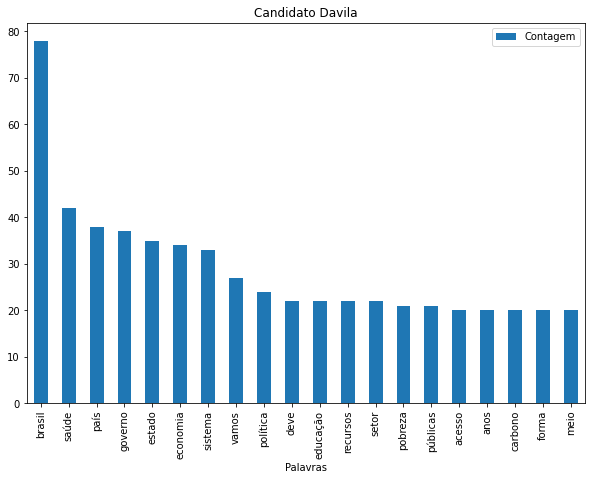

In [ ]:
grafico(candidatos[9], candidatos[9])

Cabe destacar aqui a palavra "saúde", que aparece em segundo lugar. Em seguida, menciona-se a palavra "carbono", muito provavelmente se referindo à economia de baixo carbono. Não apareceu, por exemplo, a palavra "privatização", uma das principais bandeiras do Novo.

#10) Pablo Marçal - Pros

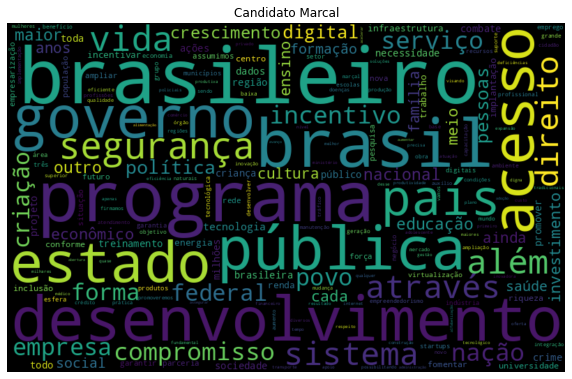

In [ ]:
#Nuvem de plavra do plano de governo de Pablo Marçal - Pros
wordcloud(candidatos[10], candidatos[10])

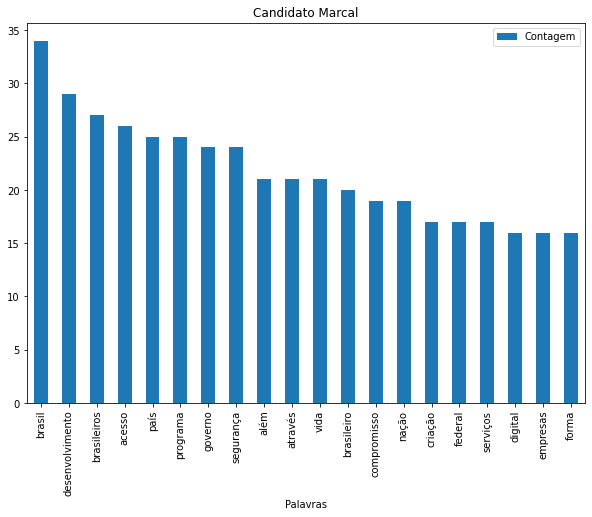

In [ ]:
grafico(candidatos[10], candidatos[10])

Observa-se um viés fortemente nacionalista no plano de governo, por meio das principais palavras utilizadas, a exemplo de "brasil", "desenvolvimento", "brasileiros" e "país". Destaque para a palavra "digital", que não apareceu nos demais planos de governo.

#11) Sofia Manzano - PCB

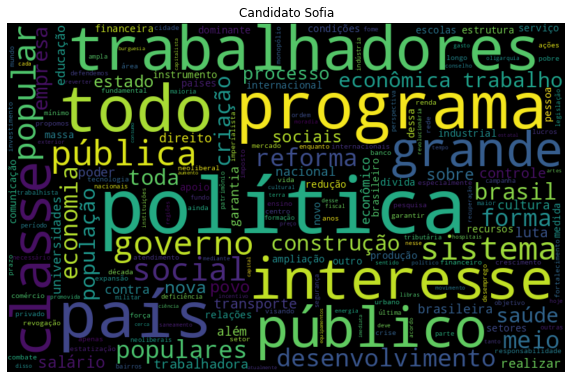

In [ ]:
#Nuvem de plavra do plano de governo de Sofia Manzano - PCB
wordcloud(candidatos[11], candidatos[11])

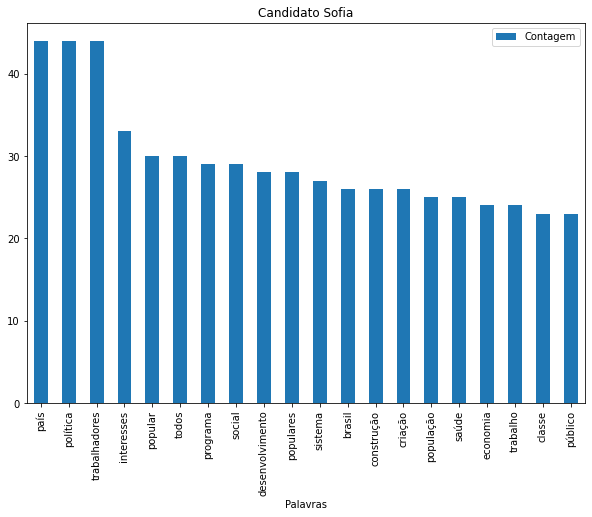

In [ ]:
grafico(candidatos[11], candidatos[11])

A candidata Sofia destaca a classe trabalhadora (3ª posição), seguida de "interesses" e "popular", o que demonstra o viés de esquerda do plano da candidata, corroborado pelas palavras "social" e "populares".